In [1025]:
print("Hello World!")

Hello World!


In [1026]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Daily Ride Prediction

Loading Dataset

In [1027]:
daily=pd.read_csv("daily_ml.csv")
daily.head(2)

,Casual,Date,Registered,Total_rides,Apparent_temperature_mean (°C),Temperature_2m_mean (°C),Weathercode (wmo code),Windspeed_10m_max (km/h),Weather,Clear Weather,...,Drizzle Weather,Rainy Weather,Snowy Weather,Year,Season,Weekday,Workingday,Working_day,Weekend,Month
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rain,0,...,0,1,0,2021,Winter,Fri.,Yes,1,0,Jan.
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Drizzle,0,...,1,0,0,2021,Winter,Sat.,No,0,1,Jan.


In [1028]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Registered                      1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   Apparent_temperature_mean (°C)  1095 non-null   float64
 5   Temperature_2m_mean (°C)        1095 non-null   float64
 6   Weathercode (wmo code)          1095 non-null   int64  
 7   Windspeed_10m_max (km/h)        1095 non-null   float64
 8   Weather                         1095 non-null   object 
 9   Clear Weather                   1095 non-null   int64  
 10  Cloudy Weather                  1095 non-null   int64  
 11  Drizzle Weather                 1095 non-null   int64  
 12  Rainy Weather                   10

In [1029]:
# checking for missing values
daily.isnull().sum()

Casual                            0
Date                              0
Registered                        0
Total_rides                       0
Apparent_temperature_mean (°C)    0
Temperature_2m_mean (°C)          0
Weathercode (wmo code)            0
Windspeed_10m_max (km/h)          0
Weather                           0
Clear Weather                     0
Cloudy Weather                    0
Drizzle Weather                   0
Rainy Weather                     0
Snowy Weather                     0
Year                              0
Season                            0
Weekday                           0
Workingday                        0
Working_day                       0
Weekend                           0
Month                             0
dtype: int64

In [1030]:
daily.describe().T

,count,mean,std,min,25%,50%,75%,max
Casual,1095.0,3836.715068,2114.895305,174.0,2122.00,3595.0,5321.00,12839.0
Registered,1095.0,5929.492237,2419.273171,323.0,4292.50,5848.0,7577.00,12580.0
Total_rides,1095.0,9766.207306,4129.630135,497.0,6741.50,9759.0,13020.00,20174.0
Apparent_temperature_mean (°C),1095.0,12.836438,11.889420,-15.2,2.70,13.1,23.40,34.7
Temperature_2m_mean (°C),1095.0,14.412785,9.667675,-9.1,6.25,14.9,22.75,34.7
Weathercode (wmo code),1095.0,24.391781,27.774440,0.0,1.00,3.0,53.00,75.0
Windspeed_10m_max (km/h),1095.0,16.051050,5.880358,5.6,11.70,14.7,19.40,40.1
Clear Weather,1095.0,0.602740,0.489554,0.0,0.00,1.0,1.00,1.0
Cloudy Weather,1095.0,0.123288,0.328917,0.0,0.00,0.0,0.00,1.0
Drizzle Weather,1095.0,0.155251,0.362309,0.0,0.00,0.0,0.00,1.0


## Univeriate Simple linear

In [1031]:
## Data frame for Temperature and total rides
temperature_rides=daily[["Temperature_2m_mean (°C)", "Total_rides"]]
display(temperature_rides)

,Temperature_2m_mean (°C),Total_rides
0,2.3,961
1,7.6,5718
2,3.9,1628
3,4.1,2981
4,4.0,3061
...,...,...
1090,-4.3,2580
1091,-2.5,7918
1092,-3.9,8659
1093,-2.9,7594


Text(0.5, 0, 'Temperature (°C)')

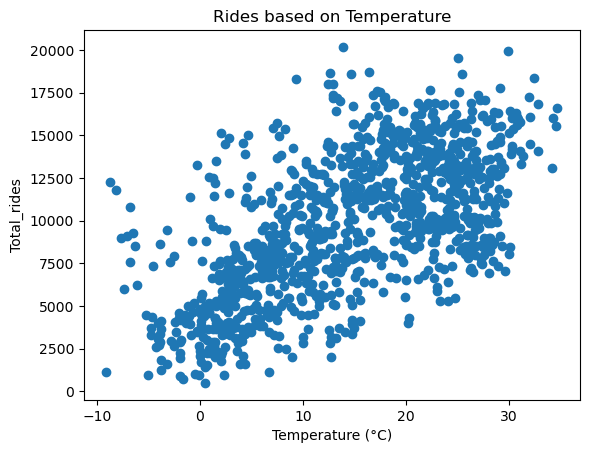

In [1032]:
plt.scatter(data=temperature_rides,x="Temperature_2m_mean (°C)",y="Total_rides")
plt.title("Rides based on Temperature")
plt.ylabel("Total_rides")
plt.xlabel("Temperature (°C)")
# Add regression line using seaborn
#sns.regplot(data=temperature_rides, x="Temperature_2m_mean (°C)", y="Total_rides", scatter=False)

In [1033]:
# Data frame for Windspeed and Total rides
windspeed_rides=daily[["Windspeed_10m_max (km/h)", "Total_rides"]]
display(windspeed_rides)

,Windspeed_10m_max (km/h),Total_rides
0,10.6,961
1,19.1,5718
2,13.0,1628
3,13.3,2981
4,9.2,3061
...,...,...
1090,10.1,2580
1091,12.8,7918
1092,9.5,8659
1093,13.8,7594


Text(0.5, 0, 'Windspeed_10m_max (km/h)')

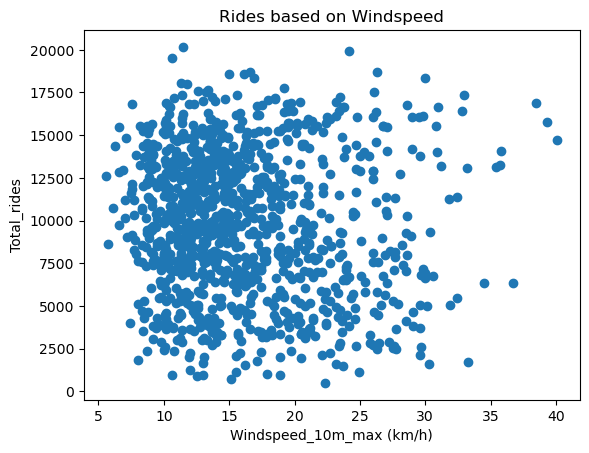

In [1034]:
plt.scatter(data=windspeed_rides,x="Windspeed_10m_max (km/h)",y="Total_rides")
plt.title("Rides based on Windspeed")
plt.ylabel("Total_rides")
plt.xlabel("Windspeed_10m_max (km/h)")

In [1035]:
# Data frame for Weekday and Total rides
weekday_rides=daily[["Weekday", "Total_rides"]]
display(weekday_rides)

,Weekday,Total_rides
0,Fri.,961
1,Sat.,5718
2,Sun.,1628
3,Mon.,2981
4,Tue.,3061
...,...,...
1090,Wed.,2580
1091,Thur.,7918
1092,Fri.,8659
1093,Sat.,7594


Text(0.5, 0, 'Weekday')

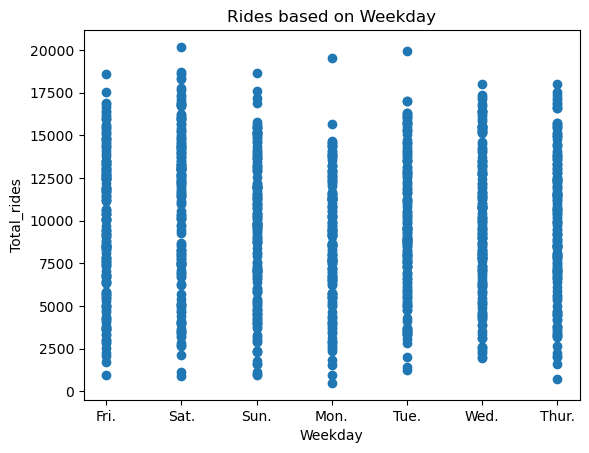

In [1036]:
plt.scatter(data=weekday_rides,x="Weekday",y="Total_rides")
plt.title("Rides based on Weekday")
plt.ylabel("Total_rides")
plt.xlabel("Weekday")

In [1037]:
# Data frame for Season and Total rides
season_rides=daily[["Season", "Total_rides"]]
display(season_rides)

,Season,Total_rides
0,Winter,961
1,Winter,5718
2,Winter,1628
3,Winter,2981
4,Winter,3061
...,...,...
1090,Winter,2580
1091,Winter,7918
1092,Winter,8659
1093,Winter,7594


Text(0.5, 0, 'Season')

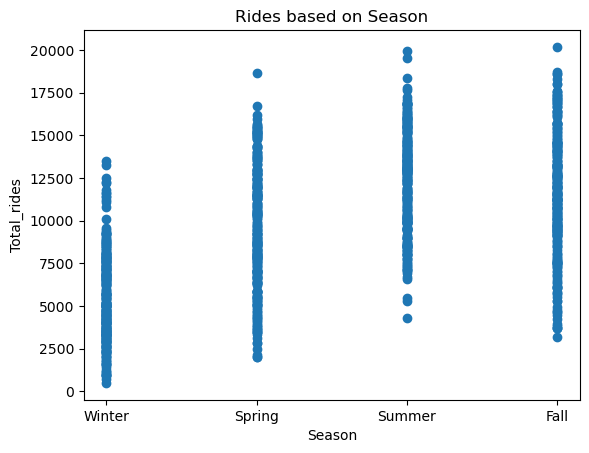

In [1038]:
plt.scatter(data=season_rides,x="Season",y="Total_rides")
plt.title("Rides based on Season")
plt.ylabel("Total_rides")
plt.xlabel("Season")

In [1039]:
# Data frame for Month and Total rides
month_rides=daily[["Month", "Total_rides"]]
display(month_rides)

,Month,Total_rides
0,Jan.,961
1,Jan.,5718
2,Jan.,1628
3,Jan.,2981
4,Jan.,3061
...,...,...
1090,Dec.,2580
1091,Dec.,7918
1092,Dec.,8659
1093,Dec.,7594


Text(0.5, 0, 'Month')

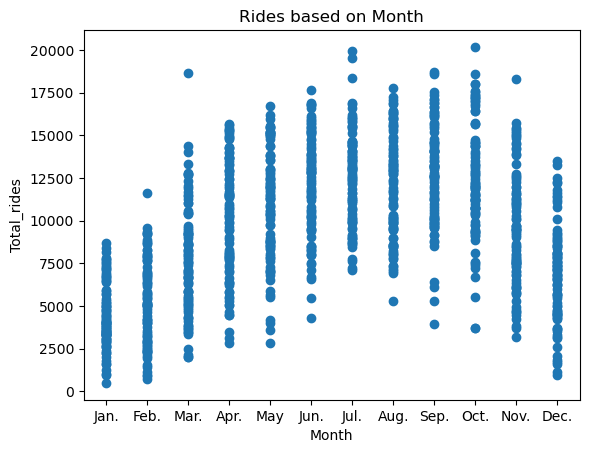

In [1040]:
plt.scatter(data=month_rides,x="Month",y="Total_rides")
plt.title("Rides based on Month")
plt.ylabel("Total_rides")
plt.xlabel("Month")

Data preparation for Simple linear regression

In [1041]:
### Temperature and Total rides
#dependent variable
temperature_rides_target=temperature_rides["Total_rides"]
temperature_rides_independent=temperature_rides["Temperature_2m_mean (°C)"]
display(temperature_rides_target.shape)
display(temperature_rides_independent.shape)

(1095,)

(1095,)

In [1042]:
temperature_rides_independent

0       2.3
1       7.6
2       3.9
3       4.1
4       4.0
       ... 
1090   -4.3
1091   -2.5
1092   -3.9
1093   -2.9
1094   -4.6
Name: Temperature_2m_mean (°C), Length: 1095, dtype: float64

In [1043]:
temperature_rides_target

0        961
1       5718
2       1628
3       2981
4       3061
        ... 
1090    2580
1091    7918
1092    8659
1093    7594
1094    7327
Name: Total_rides, Length: 1095, dtype: int64

In [1044]:
### windspeed and Total rides
#dependent variable
windspeed_rides_target=windspeed_rides["Total_rides"]
windspeed_rides_independent=windspeed_rides["Windspeed_10m_max (km/h)"]
display(windspeed_rides_target.shape)
display(windspeed_rides_independent.shape)

(1095,)

(1095,)

In [1045]:
### weekday and Total rides
#dependent variable
weekday_rides_target=weekday_rides["Total_rides"]
weekday_rides_independent=weekday_rides["Weekday"]
display(weekday_rides_target.shape)
display(weekday_rides_independent.shape)


(1095,)

(1095,)

In [1046]:
### season and Total rides
#dependent variable
season_rides_target=season_rides["Total_rides"]
season_rides_independent=season_rides["Season"]
display(season_rides_target.shape)
display(season_rides_independent.shape)

(1095,)

(1095,)

In [1047]:
### month and Total rides
#dependent variable
month_rides_target=month_rides["Total_rides"]
month_rides_independent=month_rides["Month"]
display(month_rides_target.shape)
display(month_rides_independent.shape)

(1095,)

(1095,)

In [1048]:
# Reshape the data using array.reshape(-1, 1)
reshaped_temperature_rides_independent=temperature_rides.values.reshape(-1, 1)
reshaped_windspeed_rides_independent=windspeed_rides.values.reshape(-1,1)
reshaped_seaon_rides_independent=season_rides.values.reshape(-1, 1)
reshaped_weekday_rides_independentt=weekday_rides.values.reshape(-1, 1)
reshaped_month_rides_independent=month_rides.values.reshape(-1, 1)
reshaped_rides_target=temperature_rides.values.reshape(-1, 1)

splitting

In [1049]:
reshaped_temperature_rides_independent_train, reshaped_temperature_rides_independent_test,reshaped_temperature_rides_target_train, reshaped_temperature_rides_target_test = train_test_split(reshaped_temperature_rides_independent,reshaped_rides_target, test_size=0.2, random_state=42)

In [1050]:
reshaped_temperature_rides_independent.shape

(2190, 1)

In [1051]:
reshaped_rides_target.shape

(2190, 1)

Model

In [1052]:
lr=LinearRegression()
lr.fit(reshaped_temperature_rides_independent_train,reshaped_temperature_rides_target_train)

LinearRegression()

In [1053]:
temperature_rides_pred = lr.predict(reshaped_temperature_rides_independent_test)

Evaluate

In [1054]:
# Evaluate performance (using Mean Squared Error in this example)
mse = mean_squared_error(reshaped_temperature_rides_target_test, temperature_rides_pred)
r2=r2_score(reshaped_temperature_rides_target_test,temperature_rides_pred)

print(mse)
print(r2)
    

0.0
1.0


Please go through this

Preprocessing 

In [1055]:
#Dropping some irielevant columns

columns_to_drop = ["Casual", "Date", "Weather","Registered","Season","Apparent_temperature_mean (°C)", "Weathercode (wmo code)", "Clear Weather", "Cloudy Weather", "Drizzle Weather", "Rainy Weather", "Snowy Weather", "Year", "Weekend", "Working_day", "Workingday"]
daily.drop(columns_to_drop, axis=1, inplace=True)

In [1056]:
daily.head(3)

,Total_rides,Temperature_2m_mean (°C),Windspeed_10m_max (km/h),Weekday,Month
0,961,2.3,10.6,Fri.,Jan.
1,5718,7.6,19.1,Sat.,Jan.
2,1628,3.9,13.0,Sun.,Jan.


Encoding

In [1057]:


# Define columns to encode
columns_to_encode = [ "Weekday", "Month"]

# Use get_dummies() to encode these columns
encoded_daily = pd.get_dummies(daily, columns=columns_to_encode)

# Display the encoded DataFrame
encoded_daily.head(2)


,Total_rides,Temperature_2m_mean (°C),Windspeed_10m_max (km/h),Weekday_Fri.,Weekday_Mon.,Weekday_Sat.,Weekday_Sun.,Weekday_Thur.,Weekday_Tue.,Weekday_Wed.,...,Month_Dec.,Month_Feb.,Month_Jan.,Month_Jul.,Month_Jun.,Month_Mar.,Month_May,Month_Nov.,Month_Oct.,Month_Sep.
0,961,2.3,10.6,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5718,7.6,19.1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [1058]:
# Convert boolean encoded data to integer format
encoded_daily_int = encoded_daily.astype(int)

# Display data types of the encoded DataFrame
encoded_daily_int.dtypes


Total_rides                 int32
Temperature_2m_mean (°C)    int32
Windspeed_10m_max (km/h)    int32
Weekday_Fri.                int32
Weekday_Mon.                int32
Weekday_Sat.                int32
Weekday_Sun.                int32
Weekday_Thur.               int32
Weekday_Tue.                int32
Weekday_Wed.                int32
Month_Apr.                  int32
Month_Aug.                  int32
Month_Dec.                  int32
Month_Feb.                  int32
Month_Jan.                  int32
Month_Jul.                  int32
Month_Jun.                  int32
Month_Mar.                  int32
Month_May                   int32
Month_Nov.                  int32
Month_Oct.                  int32
Month_Sep.                  int32
dtype: object

In [1059]:
encoded_daily_int.head(2)

,Total_rides,Temperature_2m_mean (°C),Windspeed_10m_max (km/h),Weekday_Fri.,Weekday_Mon.,Weekday_Sat.,Weekday_Sun.,Weekday_Thur.,Weekday_Tue.,Weekday_Wed.,...,Month_Dec.,Month_Feb.,Month_Jan.,Month_Jul.,Month_Jun.,Month_Mar.,Month_May,Month_Nov.,Month_Oct.,Month_Sep.
0,961,2,10,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5718,7,19,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Data Seperation as X and y

In [1060]:
#dependent variable
y=encoded_daily_int["Total_rides"]
y.shape

(1095,)

In [1061]:
# independent varibable
X=encoded_daily_int.drop("Total_rides", axis=1)
X.shape

(1095, 21)

Data Splitting

In [1062]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1063]:
X_train

,Temperature_2m_mean (°C),Windspeed_10m_max (km/h),Weekday_Fri.,Weekday_Mon.,Weekday_Sat.,Weekday_Sun.,Weekday_Thur.,Weekday_Tue.,Weekday_Wed.,Month_Apr.,...,Month_Dec.,Month_Feb.,Month_Jan.,Month_Jul.,Month_Jun.,Month_Mar.,Month_May,Month_Nov.,Month_Oct.,Month_Sep.
6,2,14,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
575,25,12,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
821,8,25,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1063,0,8,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
905,25,10,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2,19,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
466,16,15,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
121,19,18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1044,4,14,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1064]:
X_test

,Temperature_2m_mean (°C),Windspeed_10m_max (km/h),Weekday_Fri.,Weekday_Mon.,Weekday_Sat.,Weekday_Sun.,Weekday_Thur.,Weekday_Tue.,Weekday_Wed.,Month_Apr.,...,Month_Dec.,Month_Feb.,Month_Jan.,Month_Jul.,Month_Jun.,Month_Mar.,Month_May,Month_Nov.,Month_Oct.,Month_Sep.
533,22,28,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
139,22,14,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
88,11,18,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
841,18,22,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
985,27,33,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,1,9,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
331,6,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
361,7,14,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
817,9,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Scaling

In [1065]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Building

In [1066]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

Applying the model to make prediction

In [1067]:
y_pred = lr.predict(X_test_scaled)
y_train_pred=lr.predict(X_train_scaled)

In [1068]:
y_pred

array([12860.43712203, 11885.35087103,  8069.37659651, 12315.73009424,
       13304.1879592 , 10829.01433902, 13538.71324894, 12157.43059446,
        5710.79296144,  8077.47823866, 13093.84410866, 11023.32848422,
       10948.73322191, 11427.94690327, 12780.17318732, 10766.59046641,
       11711.61937658, 13250.38564487,  4930.86504789,  5097.09323852,
        4571.06506049, 12631.71031129, 12509.08852655,  9175.93105586,
       11485.63837717,  6378.27927046,  8131.48811537,  3324.24222635,
       11106.50368784,  8618.35535462,  9971.61813159,  5402.33356851,
       12200.7582081 ,  4064.01145138, 12743.12716268, 12542.22762341,
        6138.87353626,  9289.75854904, 11216.26568706, 12306.41304766,
        5471.16996838, 11777.1135134 ,  3033.91503884, 10851.64610546,
       12163.59128977, 11765.75848545,  8993.94868581, 13255.71260991,
       12869.23483354,  9912.79946734, 11779.5420366 ,  3172.59557858,
        9892.77629597, 13394.48150299, 10063.15586498,  6345.76315203,
      

Model Evaluation

In [1069]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
lr_test_r2=r2_score(y_test,y_pred)
print(mse)
print(lr_test_r2)

7806990.70665579
0.571121986159131


Polynomial Daily

In [1070]:

from sklearn.preprocessing import PolynomialFeatures

# Polynomial features transformation
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the training data
y_train_predicted = poly_reg.predict(X_train_poly)

# Evaluate model performance on training data
mse_train = mean_squared_error(y_train, y_train_predicted)
r2_train = r2_score(y_train, y_train_predicted)
print("Training Set - Mean Squared Error:", mse_train)
print("Training Set - R2 Score:", r2_train)

# Visualize the polynomial regression model
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.plot(X_train, y_train_predicted, color='red', label='Polynomial regression')
#plt.title('Polynomial Regression')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.legend()
#plt.show()

# Evaluate the model on test data
X_test_poly = poly_features.transform(X_test)
y_test_predicted = poly_reg.predict(X_test_poly)

# Evaluate model performance on test data
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_test = r2_score(y_test, y_test_predicted)
print("Test Set - Mean Squared Error:", mse_test)
print("Test Set - R2 Score:", r2_test)

Training Set - Mean Squared Error: 6508665.225509042
Training Set - R2 Score: 0.6113531437454742
Test Set - Mean Squared Error: 8010672.474006941
Test Set - R2 Score: 0.5599327027182417


Other Alogrithms

In [1071]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Define a list of regression algorithms
algorithms = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Iterate over each algorithm, train it, make predictions, and evaluate performance
for algorithm in algorithms:
    # Train the algorithm
    algorithm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = algorithm.predict(X_test)
    
    
    # Evaluate performance (using Mean Squared Error in this example)
    mse = mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test,y_pred)
    
    
    # Print the name of the algorithm and its performance
    print(f"{algorithm.__class__.__name__} - MSE: {mse}")
    print(f"{algorithm.__class__.__name__} - R2: {r2}")
    print(" ") # print an empty line


LinearRegression - MSE: 7806990.706655765
LinearRegression - R2: 0.5711219861591323
 
Ridge - MSE: 7819347.047513411
Ridge - R2: 0.5704431890240402
 
Lasso - MSE: 7809194.318497862
Lasso - R2: 0.5710009304661482
 
RandomForestRegressor - MSE: 7872194.051463804
RandomForestRegressor - R2: 0.5675400322324788
 
GradientBoostingRegressor - MSE: 7189129.488777313
GradientBoostingRegressor - R2: 0.6050642696726887
 


Visualization

Text(0.5, 0, 'Actual Rides')

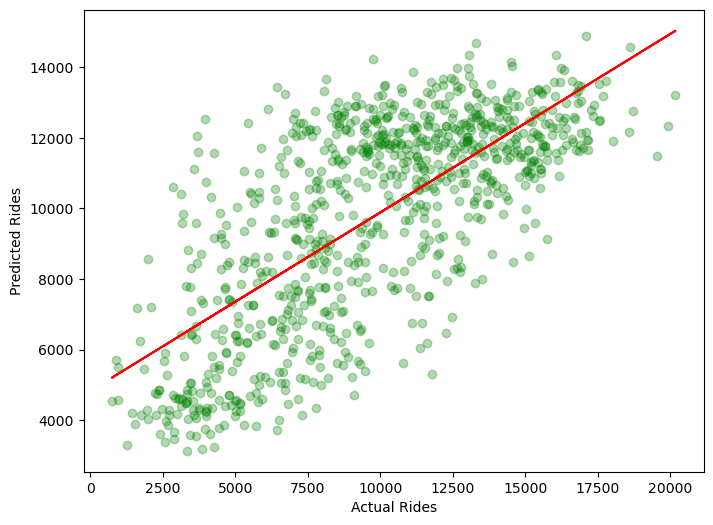

In [1072]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8,6))
plt.scatter(x=y_train, y=y_train_pred,c="green", alpha=0.3)

z =np.polyfit(y_train,y_train_pred,1)
p=np.poly1d(z)

plt.plot(y_train,p(y_train), "red")
plt.ylabel("Predicted Rides")
plt.xlabel("Actual Rides")

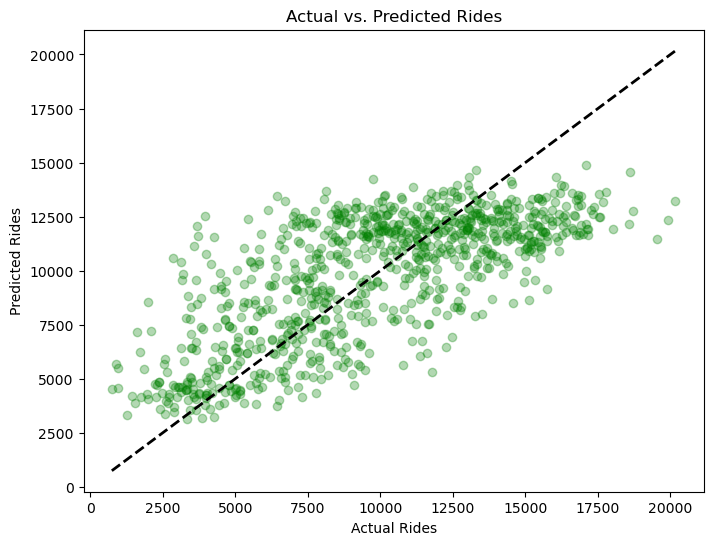

In [1073]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train_pred is your predicted values obtained from the regression model

plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=y_train_pred, c="green", alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Plotting the diagonal line

plt.title('Actual vs. Predicted Rides')
plt.xlabel('Actual Rides')
plt.ylabel('Predicted Rides')
plt.show()


## Hourly Ride Prediction 

Loading Dataset

In [1074]:
hourly=pd.read_csv("hourly_ml.csv")

In [1075]:
hourly.head()

,Casual,Date,Hour,Registered,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Weathercode (wmo code),Windspeed_10m (km/h),Weather,...,Cloudy Weather,Drizzle Weather,Rainy Weather,Snowy Weather,Season,Weekday,Year,Workingday,Month,Minutes
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Clear,...,0,0,0,0,Winter,Fri.,2021,Yes,Jan.,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Clear,...,0,0,0,0,Winter,Fri.,2021,Yes,Jan.,60
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,120
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,180
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,240


In [1076]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Registered               26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   Relativehumidity_2m (%)  26269 non-null  int64  
 6   Temperature_2m (°C)      26269 non-null  float64
 7   Weathercode (wmo code)   26269 non-null  int64  
 8   Windspeed_10m (km/h)     26269 non-null  float64
 9   Weather                  26269 non-null  object 
 10  Clear Weather            26269 non-null  int64  
 11  Cloudy Weather           26269 non-null  int64  
 12  Drizzle Weather          26269 non-null  int64  
 13  Rainy Weather            26269 non-null  int64  
 14  Snowy Weather         

In [1077]:
hourly.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Registered                 0
Total_rides                0
Relativehumidity_2m (%)    0
Temperature_2m (°C)        0
Weathercode (wmo code)     0
Windspeed_10m (km/h)       0
Weather                    0
Clear Weather              0
Cloudy Weather             0
Drizzle Weather            0
Rainy Weather              0
Snowy Weather              0
Season                     0
Weekday                    0
Year                       0
Workingday                 0
Month                      0
Minutes                    0
dtype: int64

In [1078]:
hourly.describe().T

,count,mean,std,min,25%,50%,75%,max
Casual,26269.0,159.930070,167.330426,0.0,28.0,105.0,237.0,1206.0
Hour,26269.0,11.503864,6.921180,0.0,6.0,12.0,18.0,23.0
Registered,26269.0,247.165632,225.283539,0.0,55.0,203.0,371.0,1534.0
Total_rides,26269.0,407.095702,373.005409,1.0,85.0,319.0,616.0,2262.0
Relativehumidity_2m (%),26269.0,62.962846,22.726160,5.0,46.0,64.0,82.0,100.0
Temperature_2m (°C),26269.0,14.419590,10.282328,-14.6,6.2,14.8,22.7,41.5
Weathercode (wmo code),26269.0,7.223838,17.623401,0.0,0.0,1.0,2.0,75.0
Windspeed_10m (km/h),26269.0,10.170330,5.260753,0.0,6.5,9.2,12.9,40.1
Clear Weather,26269.0,0.841638,0.365087,0.0,1.0,1.0,1.0,1.0
Cloudy Weather,26269.0,0.095436,0.293821,0.0,0.0,0.0,0.0,1.0


Preprocessing

In [1079]:
#Dropping some irielevant columns

columns_to_drop_2 = ["Casual", "Date", "Registered", "Weather","Weathercode (wmo code)", "Clear Weather", "Cloudy Weather", "Drizzle Weather", "Rainy Weather", "Snowy Weather", "Year", "Workingday", "Month", "Minutes", "Season"]
hourly.drop(columns_to_drop_2, axis=1, inplace=True)

In [1080]:
hourly.head()

,Hour,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Windspeed_10m (km/h),Weekday
0,0,46.0,90,2.4,10.2,Fri.
1,1,46.0,88,1.8,10.0,Fri.
2,2,48.0,87,1.1,10.1,Fri.
3,3,16.0,81,1.6,10.6,Fri.
4,4,12.0,77,1.6,9.9,Fri.


In [1084]:
hourly.shape

(26269, 6)

Encoding

In [1085]:
# Define columns to encode
columns_to_encode_2 = ["Weekday"]

# Use get_dummies() to encode these columns
encoded_hourly = pd.get_dummies(hourly, columns=columns_to_encode_2)

# Display the encoded DataFrame
encoded_hourly.head(2)


,Hour,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Windspeed_10m (km/h),Weekday_Fri.,Weekday_Mon.,Weekday_Sat.,Weekday_Sun.,Weekday_Thur.,Weekday_Tue.,Weekday_Wed.
0,0,46.0,90,2.4,10.2,True,False,False,False,False,False,False
1,1,46.0,88,1.8,10.0,True,False,False,False,False,False,False


In [ ]:
# Convert boolean encoded data to integer format
encoded_hourly_int = encoded_hourly.astype(int)


Data Seperation as X and y

In [1088]:
#dependent variable
y=encoded_hourly_int["Total_rides"]
y.shape

(26269,)

In [1089]:
# independent varibable
X=encoded_hourly_int.drop("Total_rides", axis=1)
X.shape

(26269, 11)

Data Splitting

In [1090]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [1091]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Building

In [1092]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

Applying the model to make prediction

In [1093]:
y_pred = lr.predict(X_test_scaled)
y_train_pred=lr.predict(X_train_scaled)

In [1094]:
y_pred

array([665.74515529, 422.44303498, 664.42210076, ..., 240.87706849,
       864.64537129, 199.54981347])

Model Evaluation

Linear regression

In [1095]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
lr_test_r2=r2_score(y_test,y_pred)
print(mse)
print(lr_test_r2)

Polynomial regression 

In [1099]:

from sklearn.preprocessing import PolynomialFeatures

# Polynomial features transformation
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the training data
y_train_predicted = poly_reg.predict(X_train_poly)

# Evaluate model performance on training data
mse_train = mean_squared_error(y_train, y_train_predicted)
r2_train = r2_score(y_train, y_train_predicted)
print("Training Set - Mean Squared Error:", mse_train)
print("Training Set - R2 Score:", r2_train)

# Visualize the polynomial regression model
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.plot(X_train, y_train_predicted, color='red', label='Polynomial regression')
#plt.title('Polynomial Regression')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.legend()
#plt.show()

# Evaluate the model on test data
X_test_poly = poly_features.transform(X_test)
y_test_predicted = poly_reg.predict(X_test_poly)

# Evaluate model performance on test data
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_test = r2_score(y_test, y_test_predicted)
print("Test Set - Mean Squared Error:", mse_test)
print("Test Set - R2 Score:", r2_test)

Training Set - Mean Squared Error: 48424.08150646218
Training Set - R2 Score: 0.6523806446772568
Test Set - Mean Squared Error: 45585.76115849677
Test Set - R2 Score: 0.6706903300196405


Other Algorithms

In [1100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Define a list of regression algorithms
algorithms = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Iterate over each algorithm, train it, make predictions, and evaluate performance
for algorithm in algorithms:
    # Train the algorithm
    algorithm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = algorithm.predict(X_test)
    
    # Evaluate performance (using Mean Squared Error in this example)
    mse = mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test,y_pred)
    
    # Print the name of the algorithm and its performance
    print(f"{algorithm.__class__.__name__} - MSE: {mse}")
    print(f"{algorithm.__class__.__name__} - R2: {r2}")
    print(" ") # print an empty line


LinearRegression - MSE: 86791.52217780512
LinearRegression - R2: 0.3730216015020129
 
Ridge - MSE: 86791.45025926
Ridge - R2: 0.37302212103863475
 
Lasso - MSE: 86704.13792924387
Lasso - R2: 0.37365286173160817
 


RandomForestRegressor - MSE: 23649.741745550742
RandomForestRegressor - R2: 0.8291552350684745
 
GradientBoostingRegressor - MSE: 32874.88288032651
GradientBoostingRegressor - R2: 0.7625131936632055
 


Peak Hours for Weekends and working days

Data Frame for Morning Rush during working days

In [1102]:
# Assuming hourly is your original DataFrame
# Filter for peak hours (let's assume peak hours are from 5 AM to 9 AM)
peak_hours = hourly[(hourly['Hour'] >= 5) & (hourly['Hour'] <= 9)]

# Filter for working days (Monday to Friday)
morning_working_days = peak_hours[peak_hours['Weekday'].isin(['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.'])]

# resetting index
morning_working_days.reset_index(drop=True, inplace=True)

#display
morning_working_days

,Hour,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Windspeed_10m (km/h),Weekday
0,5,14.0,75,1.4,8.7,Fri.
1,6,26.0,72,1.4,8.9,Fri.
2,7,27.0,71,1.4,7.9,Fri.
3,8,55.0,71,1.4,7.1,Fri.
4,9,76.0,70,1.6,7.2,Fri.
...,...,...,...,...,...,...
3120,5,42.0,40,0.8,1.5,Fri.
3121,6,123.0,50,0.3,2.2,Fri.
3122,7,207.0,42,0.2,2.3,Fri.
3123,8,305.0,47,-0.8,0.7,Fri.


Data frame for evening Rush during working days

In [ ]:

# Assuming hourly is your original DataFrame
# Filter for peak hours (let's assume peak hours are from 17:00 to 21:00)
peak_hours = hourly[(hourly['Hour'] >= 17) & (hourly['Hour'] <= 21)]

# Filter for working days (Monday to Friday)
evening_working_days = peak_hours[peak_hours['Weekday'].isin(['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.'])]

# resetting index
evening_working_days.reset_index(drop=True, inplace=True)

#display
evening_working_days

Data Frame for Rush hours during Weekends

In [ ]:

# Assuming hourly is your original DataFrame
# Filter for peak hours (let's assume peak hours are from 10:00 to 16:00) at weekend
peak_hours = hourly[(hourly['Hour'] >= 10) & (hourly['Hour'] <= 16)]

# Filter for working days (Monday to Friday)
peak_weekend = peak_hours[peak_hours['Weekday'].isin(['Sat.', 'Sun.'])]

# resetting index
peak_weekend.reset_index(drop=True, inplace=True)

#display
peak_weekend

Encoding of Peak hours Data frame

In [ ]:
#morning rush during working days
# Define columns to encode
columns_to_encode_3 = ["Weekday"]

# Use get_dummies() to encode these columns
encoded_morning_working_days = pd.get_dummies(morning_working_days, columns=columns_to_encode_3)


#Evening rush during working days
# Define columns to encode
columns_to_encode_4 = ["Weekday"]

# Use get_dummies() to encode these columns
encoded_evening_working_days = pd.get_dummies(evening_working_days, columns=columns_to_encode_4)


#morning rush during working days
# Define columns to encode
columns_to_encode_5 = ["Weekday"]

# Use get_dummies() to encode these columns
encoded_peak_weekend = pd.get_dummies(peak_weekend, columns=columns_to_encode_5)





In [1103]:
# Convert boolean encoded data to integer format

encoded_morning_working_days_int = encoded_morning_working_days.astype(int)

encoded_evening_working_days_int = encoded_evening_working_days.astype(int)

encoded_peak_weekend_int = encoded_peak_weekend.astype(int)



Data Seperation as X and y

In [1105]:
#dependent variable
morning_y=encoded_morning_working_days_int["Total_rides"]

# independent varibable
morning_X=encoded_morning_working_days_int.drop("Total_rides", axis=1)
print(morning_X.shape)
print(morning_y.shape)

(3125, 8)
(3125,)


Data Spliting

In [1106]:
morning_X_train, morning_X_test,morning_y_train, morning_y_test = train_test_split(morning_X, morning_y, test_size=0.2, random_state=42)

Model

Linear Regression for moring rush during working day

In [1107]:
lr=LinearRegression()
lr.fit(morning_X_train,morning_y_train)

LinearRegression()

Predict

In [1108]:
morning_y_pred = lr.predict(morning_X_test)


Evaluate

In [1109]:
# Evaluate the morning_y_pred
mse = mean_squared_error(morning_y_test, morning_y_pred)
lr_test_r2=r2_score(morning_y_test,morning_y_pred)
print(mse)
print(lr_test_r2)

42074.92902080213
0.49677791856340237


Polynomial regresion for Morning rush during working day

In [1110]:

from sklearn.preprocessing import PolynomialFeatures

# Polynomial features transformation
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(morning_X_train)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, morning_y_train)

# Make predictions on the training data
y_train_predicted = poly_reg.predict(X_train_poly)

# Evaluate model performance on training data
mse_train = mean_squared_error(morning_y_train, y_train_predicted)
r2_train = r2_score(morning_y_train, y_train_predicted)
print("Training Set - Mean Squared Error:", mse_train)
print("Training Set - R2 Score:", r2_train)

# Visualize the polynomial regression model
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.plot(X_train, y_train_predicted, color='red', label='Polynomial regression')
#plt.title('Polynomial Regression')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.legend()
#plt.show()

# Evaluate the model on test data
X_test_poly = poly_features.transform(morning_X_test)
y_test_predicted = poly_reg.predict(X_test_poly)

# Evaluate model performance on test data
mse_test = mean_squared_error(morning_y_test, y_test_predicted)
r2_test = r2_score(morning_y_test, y_test_predicted)
print("Test Set - Mean Squared Error:", mse_test)
print("Test Set - R2 Score:", r2_test)

Training Set - Mean Squared Error: 21362.643529705823
Training Set - R2 Score: 0.7727309058473578
Test Set - Mean Squared Error: 21738.077077129517
Test Set - R2 Score: 0.7400095342341766
